# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import mythinkstats as mts
import numpy as np
import pandas as pd
import random

print('Ready')

Ready


## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
# Implemented mts.est_rmse().

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
n = 7     # Single sample size.
m = 1000  # Number of samples taken.
mu = 0
sigma = 1
samples = np.random.normal(mu, sigma, (m, n))
sample_means = np.mean(samples, axis=1)
sample_medians = np.median(samples, axis=1)

print('RMSE(sample means, mu)=%.3lf' % mts.est_rmse(sample_means, mu))
print('RMSE(sample medians, mu)=%.3lf' % mts.est_rmse(sample_medians, mu))

RMSE(sample means, mu)=0.384
RMSE(sample medians, mu)=0.474


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
# Implemented mts.est_mean_error().

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
n = 7
m = 1000
mu = 0
sigma = 1
samples = np.random.normal(0, 1, (m, n))
sample_vars = np.var(samples, axis=1)
sample_vars_ = np.var(samples, axis=1, ddof=1)

print('Mean error(true, biased)=%.3lf' % mts.est_mean_error(sample_vars, sigma**2))
print('Mean error(true, unbiased)=%.3lf' % mts.est_mean_error(sample_vars_, sigma**2))

Mean error(true, biased)=-0.145
Mean error(true, unbiased)=-0.003


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
# This is trivial to implement without a function.
n, m = 9, 1000
mu, sigma = 90, 7.5
samples = np.random.normal(mu, sigma, (m, n))
sample_means = np.mean(samples, axis=1)
sample_means[:10]

array([90.39047574, 91.43941407, 90.15709336, 86.41060993, 91.41915614,
       89.90719865, 90.05307899, 91.72354346, 90.26258372, 89.10911091])

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

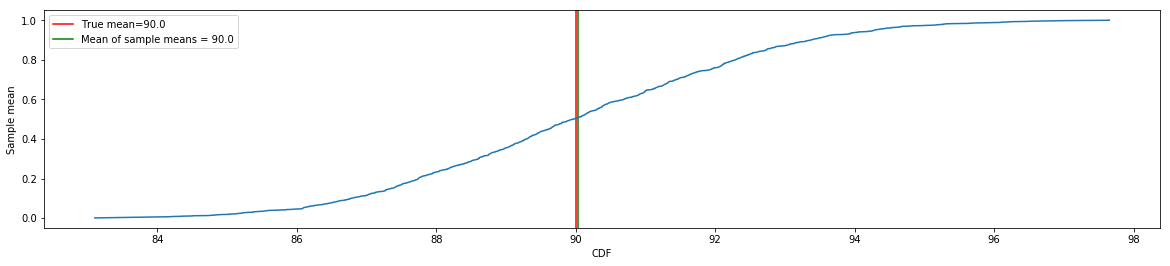

In [7]:
sample_means_pmf = pd.Series(sample_means).value_counts(normalize=True)
sample_means_cdf = mts.pmf_to_cdf(sample_means_pmf)
plt.figure(figsize=(20, 4))
plt.axvline(mu, label='True mean=%.1lf' % mu, color='red')
plt.axvline(np.mean(sample_means), color='green', label='Mean of sample means = %.1lf' % np.mean(sample_means))
plt.plot(sample_means_cdf.index, sample_means_cdf.values)
plt.ylabel('Sample mean')
plt.xlabel('CDF')
plt.legend()
plt.show()

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(sample_means)

90.0384577708976

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
# Downey notes: People often think that there is a 90% probability that the actual parameter, 
# µ, falls in the 90% confidence interval. Sadly, that is not true.
CI = mts.cdf_percentile(sample_means_cdf, 5), mts.cdf_percentile(sample_means_cdf, 95)
CI

(86.089670697431, 94.2804197332504)

And the RMSE of the sample means is called the standard error.

In [10]:
# Variance is to MSE as standard deviation is to RMSE.
mts.est_rmse(sample_means, mu)

2.5497064650098444

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
n, m = 7, 1000
lam = 2
samples = np.random.exponential(1/lam, (m, n))
sample_means = 1 / np.mean(samples, axis=1)
sample_medians = np.log(2) / np.median(samples, axis=1)

print('RMSE(L, lambda)=%.2lf' % mts.est_rmse(sample_means, lam))
print('RMSE(Lm, lambda)=%.2lf' % mts.est_rmse(sample_medians, lam))
print('Mean error(L, lambda)=%.2lf' % mts.est_mean_error(sample_means, lam))
print('Mean error(Lm, lambda)=%.2lf' % mts.est_mean_error(sample_medians, lam))

RMSE(L, lambda)=1.13
RMSE(Lm, lambda)=1.65
Mean error(L, lambda)=0.37
Mean error(Lm, lambda)=0.46


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

True mu=0.00113, sigma^2=1.00575
(128, 8)   0.022798 0.013432 0.205684 0.091389
(256, 8)   0.013763 0.012650 0.141903 0.018495
(512, 8)   0.008774 0.008815 0.119328 0.007305
(1024, 8)  0.003238 0.003940 0.141232 0.017729
(2048, 8)  0.007684 0.005966 0.123236 0.002837
(4096, 8)  0.005653 0.007539 0.132116 0.007310
(8192, 8)  0.007701 0.004185 0.124894 0.000943
(16384, 8) 0.000000 0.002051 0.127104 0.001582


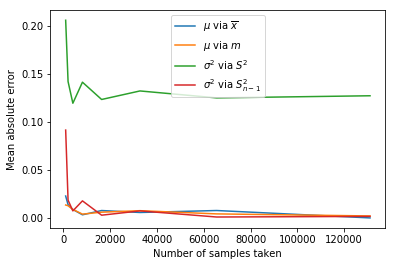

In [12]:
# Define a population, then check how the estimate errors changes as you take more 
# samples from the population. From the book: "An estimator is unbiased if the expected
# total (or mean) error after many iterations of the estimation game is 0."
# Below we see that the following both mean estimators and the ddof variance estiamtor
# is unbiased. The sample variance is a biased estimator for the variance.
n = 8
base = 2
exp_range = np.arange(10, 18)
population = np.random.normal(0, 1, base ** exp_range[-1])
mu = np.mean(population)
sigma = np.std(population)
var = sigma**2
print('True mu=%.5lf, sigma^2=%.5lf' % (mu, var))

estimator_errors = [
    ('$\mu$ via $\overline{x}$', []),
    ('$\mu$ via $m$', []),
    ('$\sigma^2$ via $S^2$', []),
    ('$\sigma^2$ via $S^2_{n-1}$', [])
]

for exp in exp_range:
    
    # Take a number of samples from the population.
    samples = np.random.choice(population, size=base ** exp, replace=False)
    samples = samples.reshape((int(base**exp/n), n))
    
    # Compute sample means and medians.
    sample_means = np.mean(samples, axis=1)
    sample_medians = np.median(samples, axis=1)
    
    # Compute sample variance and sample variance with n-1.
    sample_var = np.var(samples, axis=1)
    sample_var_nm1 = np.var(samples, axis=1, ddof=1)
    
    # Compute and store errors.
    estimator_errors[0][1].append(abs((sample_means - mu).mean()))
    estimator_errors[1][1].append(abs((sample_medians - mu).mean()))
    estimator_errors[2][1].append(abs((sample_var - var).mean()))
    estimator_errors[3][1].append(abs((sample_var_nm1 - var).mean()))
    
    # Print the errors.
    print('%-10s %-5lf %-5lf %-5lf %-5lf' % (
        str(samples.shape), *[ee[1][-1] for ee in estimator_errors]))

for label, errors in estimator_errors:
    plt.plot(base ** exp_range, errors, label=label)
    
plt.ylabel('Mean absolute error')
plt.xlabel('Number of samples taken')
plt.legend()
plt.show()

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



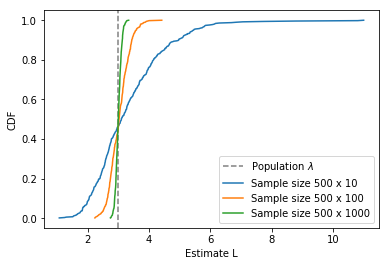

In [13]:
# Definitions:
# mean of exponential distribution is mu = 1/lambda
# It follows that lambda = 1/mu
# Since x-bar is an estimator for mu, L = 1/x-bar is an estimator for lambda.

# Result:
# When plotting the CDF for L over various sample sizes, we see that the CDF
# becomes tighter around the true lambda value as we take larger samples.

# Number of samples to take for each sample size.
m = 500

# Lambda param used to make population.
lam = 3

# Sample sizes.
n_range = 10 ** np.arange(1, 4)

# Population with more members than the largest sample.
population = np.random.exponential(1/lam, (max(n_range) * 2 * m))

# Lambda param derived from population.
lam = 1 / population.mean()

# Plot the population lambda value.
plt.axvline(lam, color='gray', linestyle='--', label='Population $\lambda$')

# Estimate L for various sample sizes.
for n in n_range:
    
    # Take m samples of size n.
    sample = np.random.choice(population, int(m * n), replace=False)
    sample = sample.reshape(m, n)
    
    # Compute estiamte L for each sample.
    Ls = 1 / sample.mean(axis=1)
    
    # Compute PMF and plot CDF of L values.
    pmf = pd.Series(Ls).value_counts(normalize=True)
    cdf = mts.pmf_to_cdf(pmf)
    plt.plot(cdf.index, cdf.values, label='Sample size %d x %d' % sample.shape)
    
plt.ylabel('CDF')
plt.xlabel('Estimate L')
plt.legend()
plt.show()

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [14]:
def simulate_single_game(lam):
    """Simulates a game and returns the estimated goal-scoring rate.
    lam: actual goal scoring rate in goals per game."""
    g = t = 0
    while t <= 1:
        t += random.expovariate(lam)
        g += int(t <= 1)
    return g # L = number of goals scored.

def simulate_many_games(lam, n):
    """Simulates many games and returns the mean error and RMSE
    of the goals scored against lam."""
    Ls = np.array([simulate_single_game(lam) for _ in range(n)])
    return mts.est_mean_error(Ls, lam), mts.est_rmse(Ls, lam)

In [15]:
# Based on the fact that the mean error converges to 0, 
# this method for estimation appears to be un-biased.
lam = 2
for n in 10 ** np.arange(1, 7):
    me, rmse = simulate_many_games(lam, n)
    print('%-8d %-8.3lf %-8.3lf' % (n, me, rmse))

10       -0.200   1.000   
100      0.170    1.439   
1000     -0.035   1.372   
10000    0.009    1.420   
100000   -0.013   1.406   
1000000  0.000    1.415   


In [16]:
print('Done')

Done
